In [ ]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

In [ ]:
class State(TypedDict):
    hello: str
    a : bool


graph_builder = StateGraph(State)


In [ ]:
def node_one(state: State):
    print("node1: ", state)
    return {
        "hello": state["hello"] + " node1",
        "a": not state["a"]
    }


def node_two(state: State):
    print("node2: ", state)
    return {
        "hello": state["hello"] + " node2"
    }

def node_three(state: State):
    print("node3: ", state)
    return {
        "hello": state["hello"] + " node3"
    }

In [ ]:
graph_builder.add_node("node_one", node_one)
graph_builder.add_node("node_two", node_two)
graph_builder.add_node("node_three", node_three)

graph_builder.add_edge(START, "node_one")
graph_builder.add_edge("node_one", "node_two")
graph_builder.add_edge("node_two", "node_three")
graph_builder.add_edge("node_three", END)


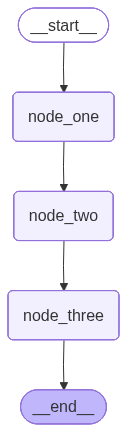

+-----------+  
| __start__ |  
+-----------+  
       *       
       *       
       *       
 +----------+  
 | node_one |  
 +----------+  
       *       
       *       
       *       
 +----------+  
 | node_two |  
 +----------+  
       *       
       *       
       *       
+------------+ 
| node_three | 
+------------+ 
       *       
       *       
       *       
  +---------+  
  | __end__ |  
  +---------+  
node1:  {'hello': 'world', 'a': True}
node2:  {'hello': 'world node1', 'a': False}
node3:  {'hello': 'world node1 node2', 'a': False}
result: {'hello': 'world node1 node2 node3', 'a': False}


In [144]:
graph = graph_builder.compile()
display(graph)
print(graph.get_graph().draw_ascii())

result = graph.invoke({
    "hello": "world",
    "a": True
})

print("result:", result)